In [1]:
from sklearn.datasets import load_iris
import pandas as pd

**load irisdataset


In [2]:
iris=load_iris()

In [5]:
df=pd.DataFrame(data=iris.data , columns=iris.feature_names)

In [6]:
df['species']=iris.target

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [9]:
print(f'\nShape of dataset:{df.shape}')


Shape of dataset:(150, 5)


In [10]:
print(f'\nbasic statistics:{df.describe()}')


basic statistics:       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [12]:
sns.set_theme(style="whitegrid")

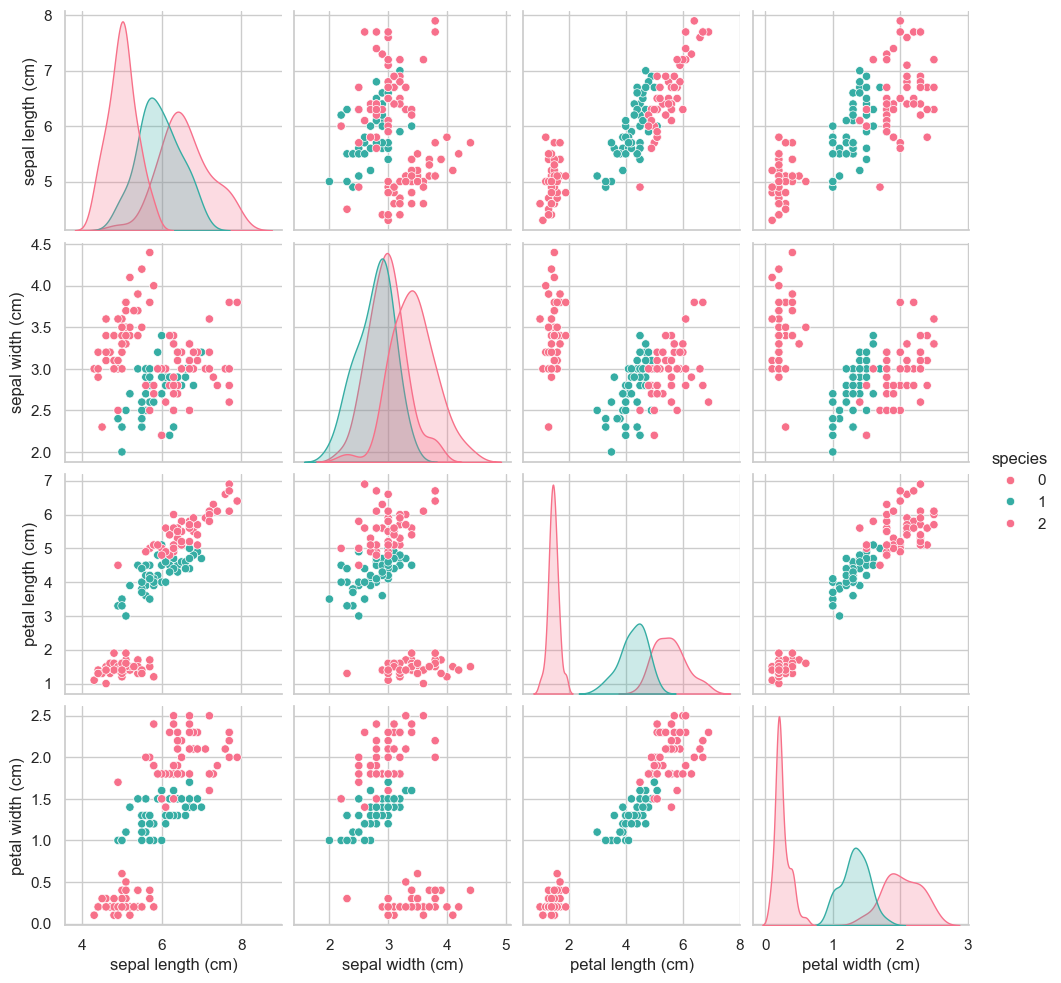

In [13]:
sns.pairplot(df,hue="species", palette="husl")
plt.show()

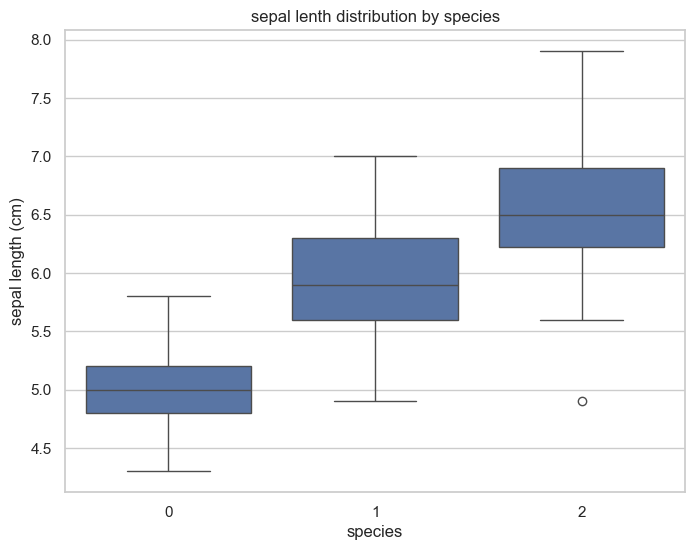

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x="species" , y="sepal length (cm)",data=df)
plt.title("sepal lenth distribution by species")
plt.show()

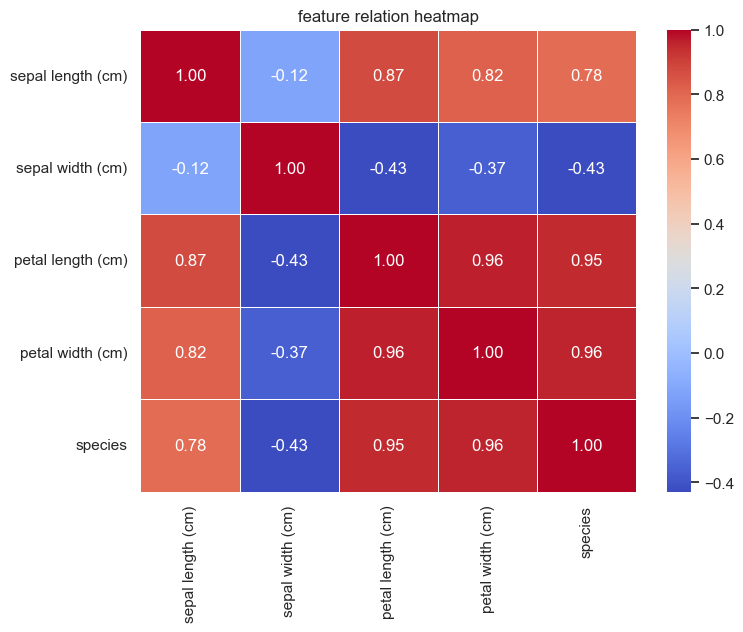

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("feature relation heatmap")
plt.show()

In [21]:
from sklearn.model_selection import train_test_split


In [23]:
X=df.drop('species',axis=1)
y=df['species']
X_train , X_test , y_train , y_test=train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
print(f"trainig set size:{X_train.shape}")
print(f"testing set size:{X_test.shape}")

trainig set size:(120, 4)
testing set size:(30, 4)


In [25]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="gini",random_state=42)
model.fit(X_train,y_train)
print("model trained successfully")


model trained successfully


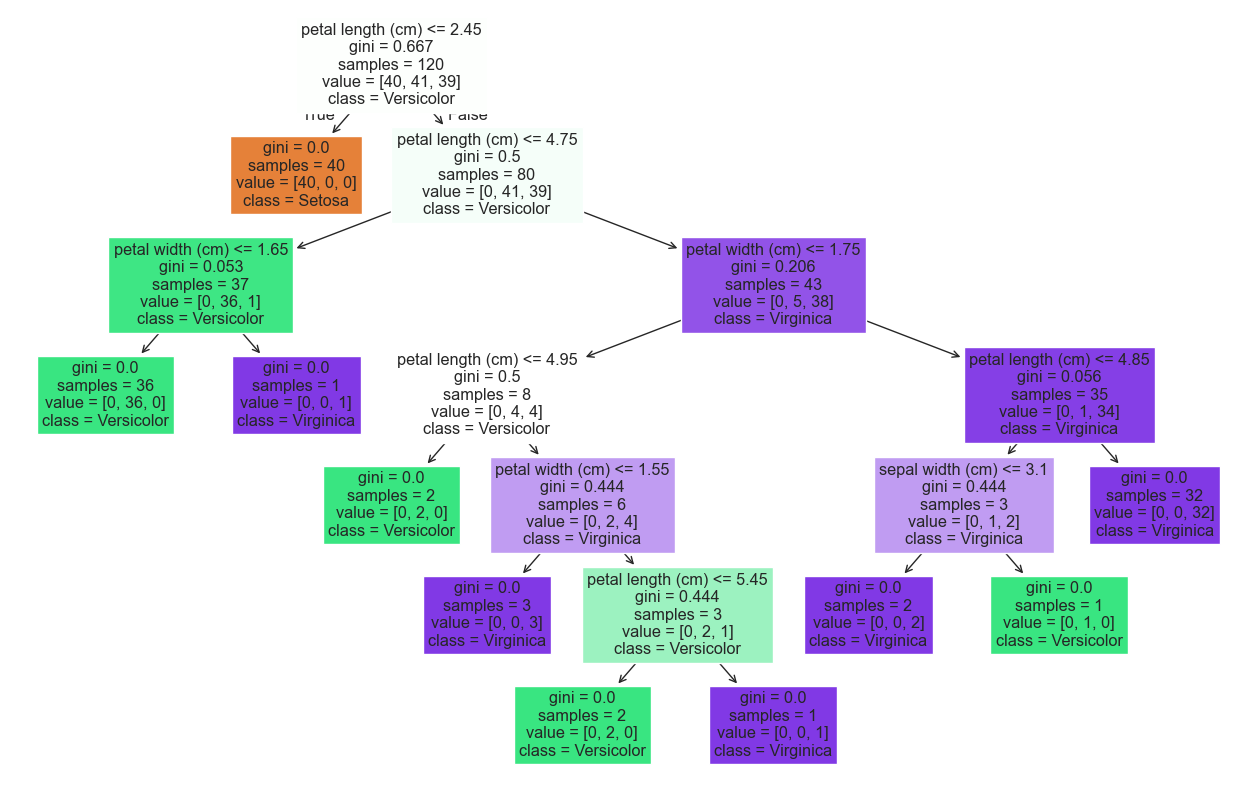

In [26]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 10))
plot_tree(model, feature_names=X.columns, class_names=["Setosa", "Versicolor", "Virginica"], filled=True)
plt.show()


In [27]:
from sklearn.metrics import accuracy_score

In [28]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy:{accuracy:.2f}")

accuracy:1.00


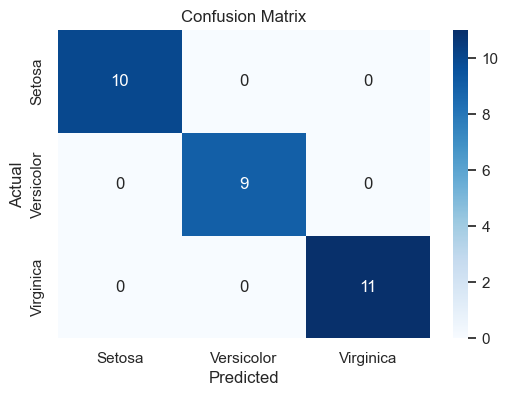

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Setosa", "Versicolor", "Virginica"], yticklabels=["Setosa", "Versicolor", "Virginica"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [30]:
from sklearn.metrics import classification_report

In [31]:
report=classification_report(y_pred,y_test,target_names=["Setosa", "Versicolor", "Virginica"])
print(report)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [32]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Create a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Hyperparameters: {best_params}")


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [33]:
# Train the best model
best_model.fit(X_train, y_train)

# Predict on test data
y_pred = best_model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Accuracy: {accuracy:.2f}")


Improved Accuracy: 1.00


In [34]:
import joblib
joblib.dump(best_model,'iris_model.pkl')
print("model save as 'iris_model.pkl'")

model save as 'iris_model.pkl'


In [35]:
# Load the saved model
loaded_model = joblib.load('iris_model.pkl')

# Use it to make predictions
new_predictions = loaded_model.predict(X_test)
print(new_predictions)



[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [36]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = best_model.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
